In [1]:
cd ../src

/home/3005019/ebm_proteins/src


In [2]:
import click
import logging
from tqdm import tqdm
from copy import deepcopy
import torch

from utils import data_utils as du
from modeling.mlp import encoding

2020-09-14 19:05:40,397 - matplotlib.pyplot - DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


# Load data and model

In [3]:
cfg = du.read_yaml("../config/config.yaml")
output_path = cfg["output_model"]
# train_pos = []
# c = 0
# for sequence in du.read_yaml(cfg["parsed_sequence"]):
#     if "X" not in sequence:
#         train_pos.append(sequence)
#         c += 1

In [ ]:
neg = du.read_yaml(cfg["generated_sequence"])

In [4]:
output_path

'models/contrastive_divergence.pickle'

In [4]:
model = torch.load(cfg["output_model"])

In [5]:
model

Sequential(
  (0): Linear(in_features=6930, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

In [5]:
import numpy as np

In [7]:
# test_neg = neg[13760:30000]

In [6]:
pos = []
for sequence in du.read_yaml(cfg["parsed_sequence"]):
    if "X" not in sequence:
        pos.append(sequence)

In [9]:
from modeling.mcmc import sample_sequences

amino_acids = cfg["amino_acids"]
parsed_sequences = cfg["parsed_sequence"]
parsed_sequences = du.read_yaml(parsed_sequences)
old_seq = parsed_sequences[np.random.randint(0, len(parsed_sequences))]
neg = sample_sequences(model, old_seq, amino_acids, n_iterations=3_000_000, step_size=3_000)

100%|██████████| 3000000/3000000 [26:36<00:00, 1879.30it/s]


In [7]:
len(pos)

36240

In [10]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [11]:
old_seq = pos[np.random.randint(0, len(pos))]

In [14]:
from copy import copy
from tqdm.notebook import tqdm

In [16]:
amino_acids = cfg["amino_acids"]

In [17]:
neg = []

for step in tqdm(range(len(pos))):
    for i in range(330):
        # Sample a random amino acid `a`
        aa_subset = copy(amino_acids)
        aa_subset.remove((old_seq[i]))
        a = np.random.choice(aa_subset)

        # Generate new sequence
        new_seq = copy(old_seq)
        new_seq = list(new_seq)
        new_seq[i] = a
        new_seq = "".join(new_seq)

        old_seq = copy(new_seq)
        
        if i == 329:
            neg.append(new_seq)
            old_seq = pos[np.random.randint(0, len(pos))]

In [10]:
import random

In [11]:
pos = random.sample(pos, k=999)

In [12]:
len(pos)

999

In [13]:
import matplotlib.pyplot as plt

# Calculate energy

Energy using the trained model

In [18]:
neg_E = [float(model(encoding(seq))) for seq in neg]
pos_E = [float(model(encoding(seq))) for seq in pos]

Energy using a random, non-trained model

In [19]:
input_size, hidden_size, output_size = 330 * 21, 100, 1

random_model = torch.nn.Sequential(
        torch.nn.Linear(input_size, hidden_size),
        torch.nn.ReLU(),
        torch.nn.Linear(hidden_size, output_size)
    )

In [16]:
neg_random = sample_sequences(random_model, old_seq, amino_acids, n_iterations=3_000_000, step_size=3_000)

100%|██████████| 3000000/3000000 [26:52<00:00, 1860.51it/s]


In [17]:
random_neg_E = [float(model(encoding(seq))) for seq in neg_random]

In [20]:
random_neg_E = [float(random_model(encoding(seq))) for seq in neg]
random_pos_E = [float(random_model(encoding(seq))) for seq in pos]

# Plots

In [21]:
import seaborn as sns
sns.set()

In [22]:
import matplotlib.pyplot as plt

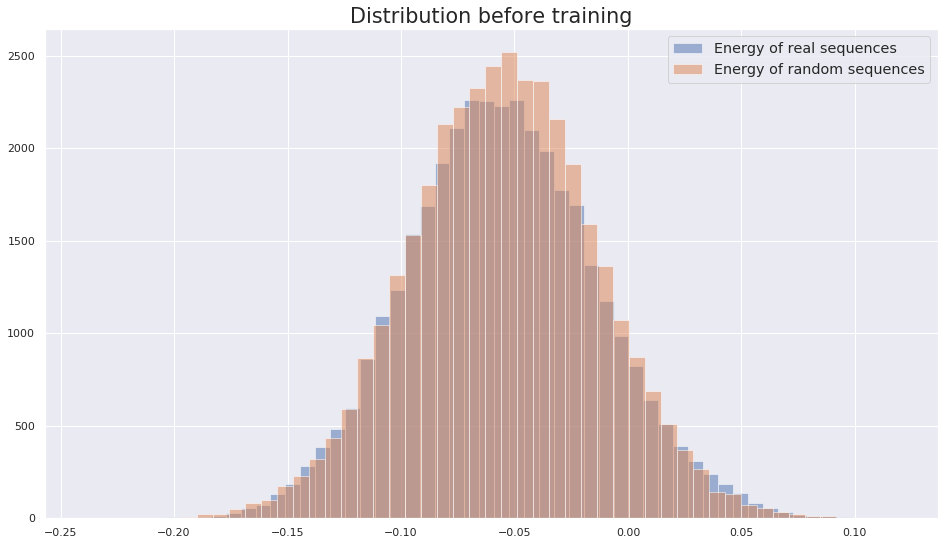

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
ax.hist(random_pos_E, alpha=0.5, label='Energy of real sequences', bins=50)
ax.hist(random_neg_E, alpha=0.5, label='Energy of random sequences', bins=50)
ax.legend(loc="upper right", fontsize="large")
ax.set_title("Distribution before training", fontsize="xx-large");

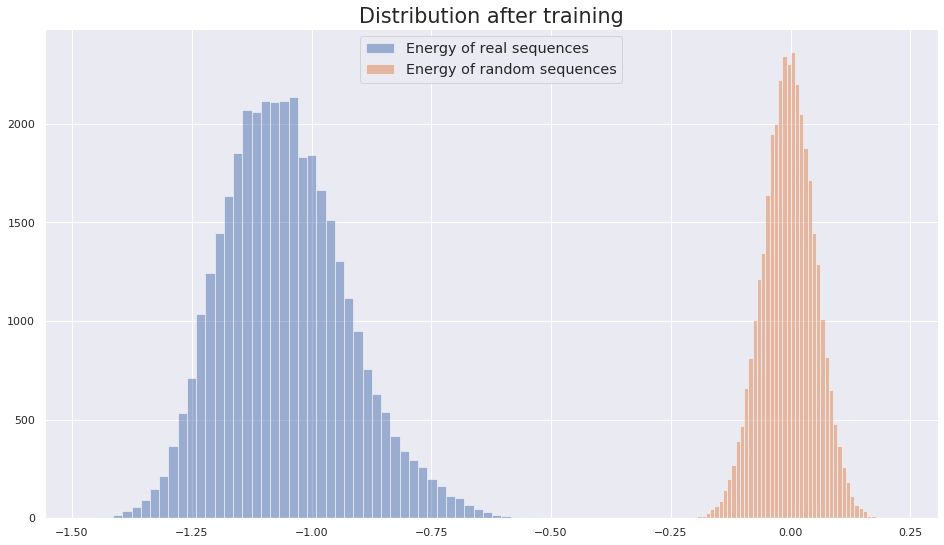

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
ax.hist(pos_E, alpha=0.5, label='Energy of real sequences', bins=50)
ax.hist(neg_E, alpha=0.5, label='Energy of random sequences', bins=50)
ax.legend(loc="upper center", fontsize="large")
ax.set_title("Distribution after training", fontsize="xx-large");

In [84]:
neg

['RF-RSGMWTQDTHEA-WFMPRHKVQSNCL-CIKVEICTFSWNRYYPVDKGNWNYFL-LTEGAMISIRCDVLGHGRQHPYYR-W-LGYYQTKNQNL-KQKQQVKDQIDPLRSNETM-RMTRNNSDGQVYEAYRFAVQFWMNLLMWEKPCTLHIDYKKTPMINFERVWHCKFDDCAKWM-TFTDAAYGCKFWVHTALAWPMGLCEDQKPQQYNV-IHMWVYMLKQRKRYMPWEWAENNLAEYMYGERTYRGCMTRTAVYPDKPRDWRHMRNDGNGCQP-HDIPNGRHVELMAFLVFIKLTTRQISICSADMA-IKFAVTQYCRCYSW-MWQL',
 'LV-LLHNTPQ-LPMKPMCGQAEPKFFWSCMWRECQTMSA-VWCTMGPNLRASISVDHTHDYQCQCYEKILKMACN-N-AKHVYLDHCKV-VYVWENWYSEGLM-YQDHLLMNMEKWQN-SLCHQAYQR-I-LGGMCMQTQLMPFAIKDPNLECIHGHHFRWWQVAPIYLSNSQNHEGMMAIYQSCFAVHDFKEWLREMRINMWQRHSILIHYHQYTFNMVVRQ-EQ-MAEGDHLMTCAD-ACAHPIV-WPCELPKTMTTFKMSETYMDSWGTIGE-KMPRGKQLCTW-KAPYEVRISCKEHF-IMQQ-FNVTCHSEEIKKWDCTYMEFLF',
 'MFMS-WWHKDQFIDKG-AEQYDCLYGYALHGTMKGQ-WPQCQFGCNTTPKKWTHHIEGDAVIDVWCHGCQWDEAHRMSKNEEKATVKIEFY-ADPDYGEEAFRWSDGPMQSVLQP-GEMSSYQVWRERIVHNQVHPLCEGNDDYGQF--CHCVLICSGIYQALFCNYMCKPLMYQEMSCYEFAYSFALNMLRLLWCPIAICPLRAVELKC--KYYLCM-ENRVCDANELNFELRDFGDASHRHQ-TAQQPSPIRLYPQSSCHIKSCFIKNPDSLMCQLA-KINEQL-FPQQCTKAPPRFCQMGCH-AHSMMVLIPGWCDHCDYEFPRS

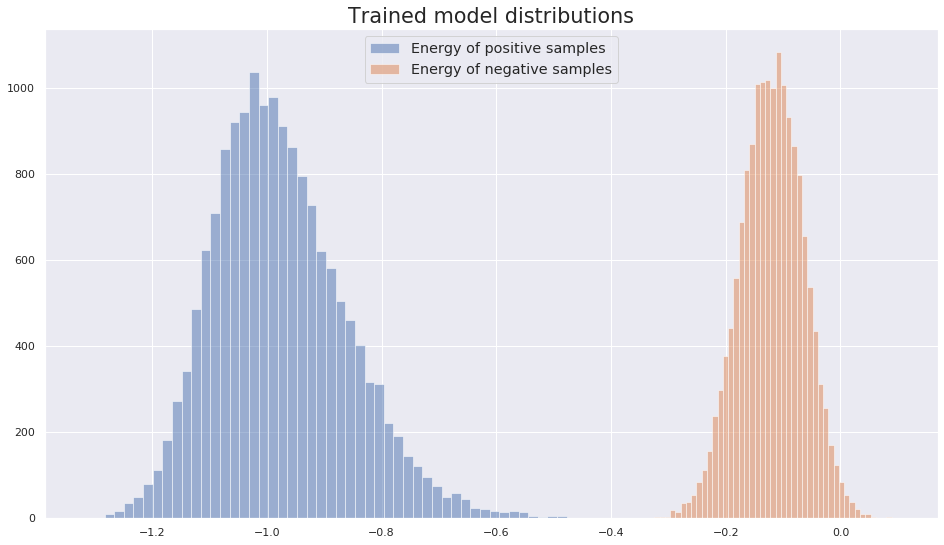

In [138]:
# Graph with the previous model - when I was only sampling once
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
ax.hist(test_pos_E, alpha=0.5, label='Energy of positive samples', bins=50)
ax.hist(test_neg_E, alpha=0.5, label='Energy of negative samples', bins=50)
ax.legend(loc="upper center", fontsize="large")
ax.set_title("Trained model distributions", fontsize="xx-large");

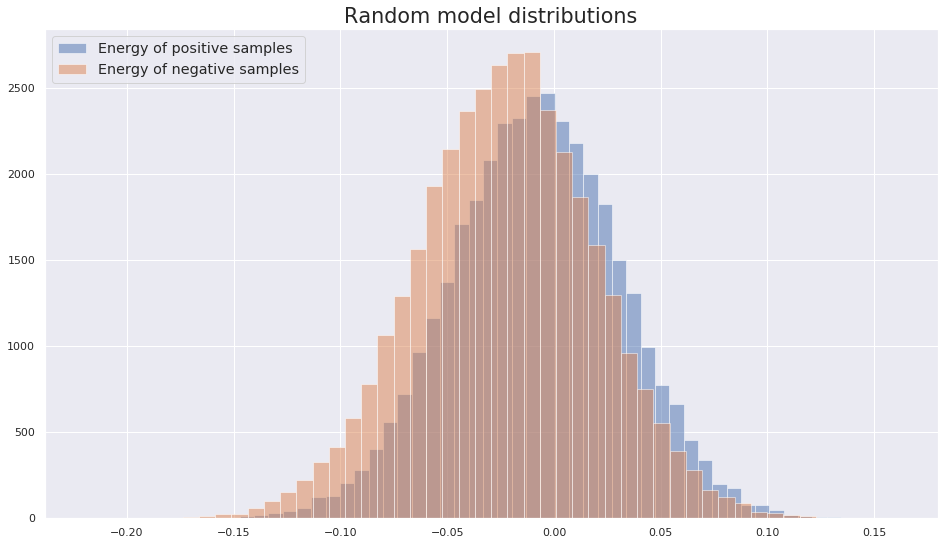

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
ax.hist(random_pos_E, alpha=0.5, label='Energy of positive samples', bins=50)
ax.hist(random_neg_E, alpha=0.5, label='Energy of negative samples', bins=50)
ax.legend(loc="upper left", fontsize="large")
ax.set_title("Random model distributions", fontsize="xx-large");

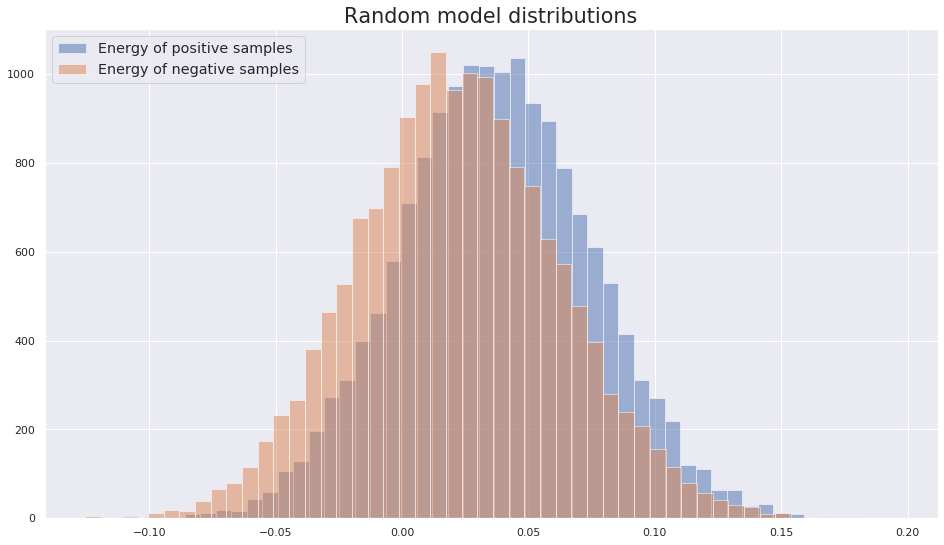

In [139]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
ax.hist(random_test_pos_E, alpha=0.5, label='Energy of positive samples', bins=50)
ax.hist(random_test_neg_E, alpha=0.5, label='Energy of negative samples', bins=50)
ax.legend(loc="upper left", fontsize="large")
ax.set_title("Random model distributions", fontsize="xx-large");

## Sampling from last epoch